In [1]:
import sys

import matplotlib.pyplot as plt
import maxi
import torch
import numpy as np

sys.path.append("../mnist/src")
from official_mnist_tf.train_mnist_model import init_model, load_mnist

2023-06-15 18:01:10.646078: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-15 18:01:10.682214: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-15 18:01:11.194611: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
x_train, y_train, x_test, y_test = load_mnist()

encoder = torch.load("/home/tuananhroman/dai/MAXi-XAI-lib/experiments/mnist/models/encoder_latent_dim_8.pt")
decoder = torch.load("/home/tuananhroman/dai/MAXi-XAI-lib/experiments/mnist/models/decoder_latent_dim_8.pt")

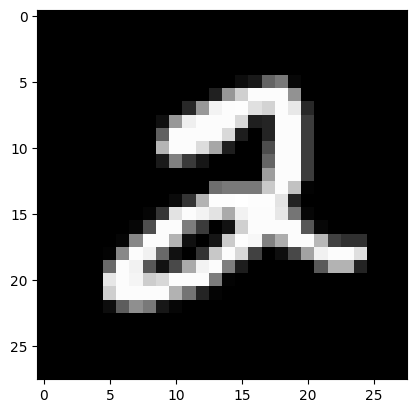

In [3]:
inputs = x_train[5].reshape(1, 28, 28)

# this is how the image looks like
plt.imshow(inputs.squeeze(axis=0), cmap="gray", vmin=-0.0, vmax=1.0)

In [11]:
_inputs = np.expand_dims(inputs, axis=0)

inference = (
    lambda x: encoder(x)
    if torch.is_tensor(x)
    else encoder(torch.tensor(x, dtype=torch.float32, device="cuda"))
)

loss_class = maxi.loss.Torch_SimDesimLoss
optimizer_class = maxi.optimizer.AdaExpGradOptimizer
gradient_class = maxi.gradient.Torch_Gradient

loss_kwargs = {"target_index": 7, "device": "cuda"}
optimizer_kwargs = {"l1": 0.05, "l2": 0.005, "channels_first": False}
gradient_kwargs = {"device": "cuda"}

expl_gen = maxi.ExplanationGenerator(
    loss=loss_class,
    optimizer=optimizer_class,
    gradient=gradient_class,
    loss_kwargs=loss_kwargs,
    optimizer_kwargs=optimizer_kwargs,
    gradient_kwargs=gradient_kwargs,
    num_iter=1000,  # number of optimization iterations
    save_freq=200,  # at which iterations the result should be saved
    verbose=True,  # print optimization metrics
)

In [5]:
results, _ = expl_gen.run(image=_inputs, inference_call=inference)

/home/tuananhroman/dai/MAXi-XAI-lib/src/maxi/lib/loss/torch_sim_desim_loss.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.org_prediction = th.tensor(self.org_prediction, device=device)
/home/tuananhroman/dai/MAXi-XAI-lib/src/maxi/lib/computation_components/optimizer/ada_exp_grad.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  self.y[:] = 1.0 / self.t * self.x + (1 - 1.0 / self.t) * self.y
/home/tuananhroman/dai/MAXi-XAI-lib/src/maxi/lib/computation_components/gradient/torch_gradient.py:26: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ../aten/src/ATen/native/Copy.cpp:276.)
  torch_data = torch.tensor(


iteration:      1 || overall_loss:   116.1270 | attack_loss: -0.1966 | l1: 116.082353 | l2: 0.241244
iteration:      2 || overall_loss:   102.6083 | attack_loss: -0.3013 | l1: 102.720734 | l2: 0.188832
iteration:      3 || overall_loss:    96.7056 | attack_loss: -0.3451 | l1: 96.882751 | l2: 0.167962
iteration:      4 || overall_loss:    91.2824 | attack_loss: -0.3849 | l1: 91.517441 | l2: 0.149868
iteration:      5 || overall_loss:    86.2843 | attack_loss: -0.4215 | l1: 86.571609 | l2: 0.134114
iteration:      6 || overall_loss:    81.6743 | attack_loss: -0.4551 | l1: 82.008972 | l2: 0.120365
iteration:      7 || overall_loss:    77.4155 | attack_loss: -0.4859 | l1: 77.793137 | l2: 0.108327
iteration:      8 || overall_loss:    73.4745 | attack_loss: -0.5142 | l1: 73.890869 | l2: 0.097754
iteration:      9 || overall_loss:    69.8230 | attack_loss: -0.5399 | l1: 70.274498 | l2: 0.088442
iteration:     10 || overall_loss:    66.4351 | attack_loss: -0.5636 | l1: 66.918541 | l2: 0.08021

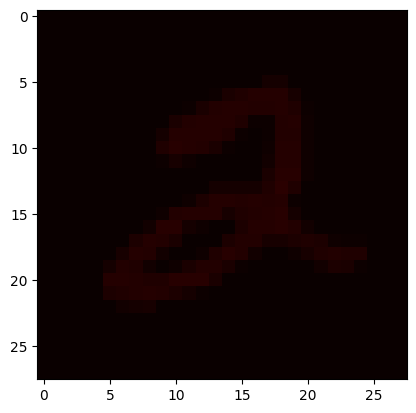

In [10]:
plt.imshow(results["200"].squeeze(axis=0).squeeze(0), cmap="hot", vmin=-0.0, vmax=1.0)

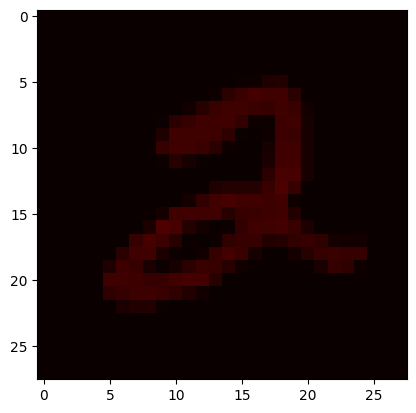

In [20]:
plt.imshow(results["100"].squeeze(axis=0).squeeze(0), cmap="hot", vmin=-0.0, vmax=1.0)

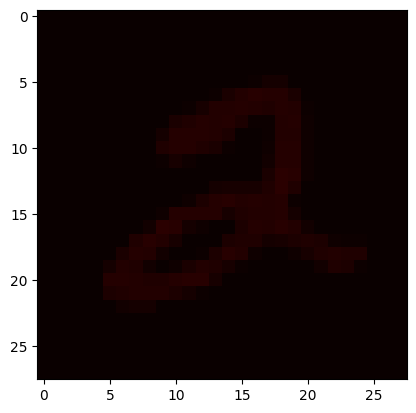

In [22]:
plt.imshow(results["200"].squeeze(axis=0).squeeze(0), cmap="hot", vmin=-0.0, vmax=1.0)